In [ ]:
#It is just a demostration on how to use madrin
#Try to use diffrent learning rate, epochs, activation functions

In [2]:
!pip install madrin

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import madrin as mad

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [6]:
#Creating the model using Network class of madrin
model=mad.Network([
    mad.Linear(100, 784, gain=1.414213562), mad.Relu(),
    mad.Linear(100,100, gain=1.414213562), mad.Relu(),
    mad.Linear(10,100, gain=0.001), mad.Softmax()
])

In [12]:
#Compile the model(Just specify the loss and learning_rate to be used)
model.compile(loss="categorical_crossentropy", lr=0.00001)

In [15]:
print(f"Initial_cost {model.cost(x_train,y_train)}")

#Train the model
model.fit(x_train,y_train,epochs=100)

print(f"Final_cost {model.cost(x_train,y_train)}")

Initial_cost 0.7097660101555422
Final_cost 0.6870285460306692


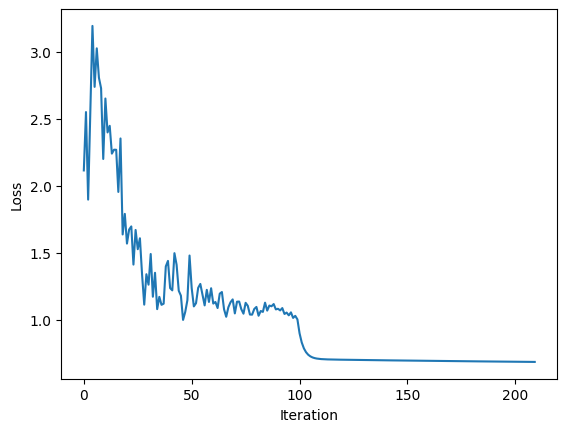

In [16]:
#After first 100 epochs(lr=0.0001) I check the below graph and found that the lr is quit high.
#So,I decrease it to (lr=0.00001) for next 100 epochs and it was damn slow
#Challenge: Try experiment with it and decrease the loss :)

#Plot the loss with each epoch
plt.plot(np.arange(len(model.costs)),model.costs)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [17]:
#Check Accuracy on test set
y_predict = model.forward(x_test)
predict = np.argmax(y_predict,axis=1)

count=0
for j in range(len(y_test)):
    if predict[j]==y_test[j]:
        count+=1
print(f"Accuracy: {(count / len(y_test))*100}%")

Accuracy: 79.63%


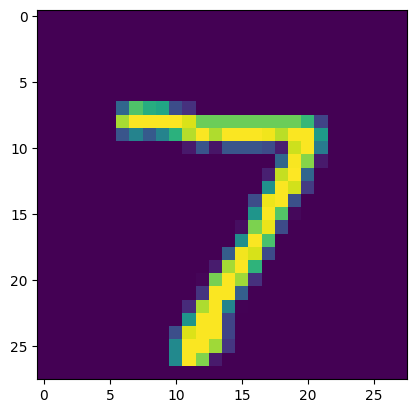

Actual Answer: 7
Predictions: 7


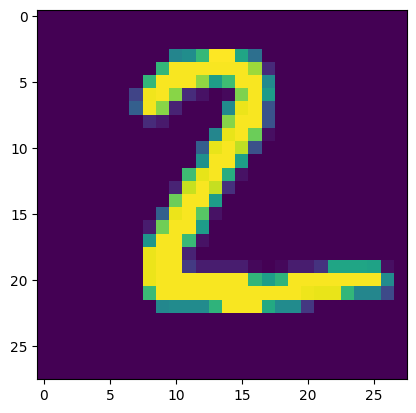

Actual Answer: 2
Predictions: 2


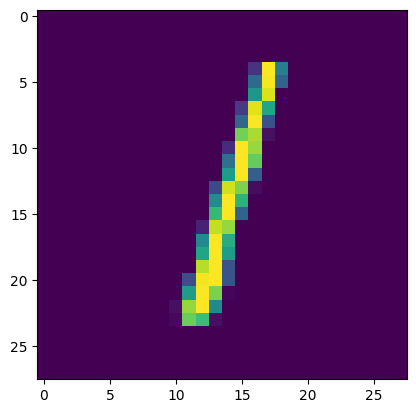

Actual Answer: 1
Predictions: 1


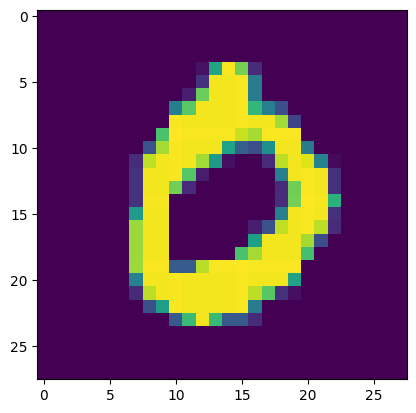

Actual Answer: 0
Predictions: 0


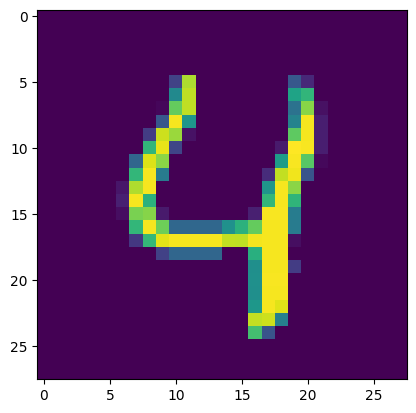

Actual Answer: 4
Predictions: 4


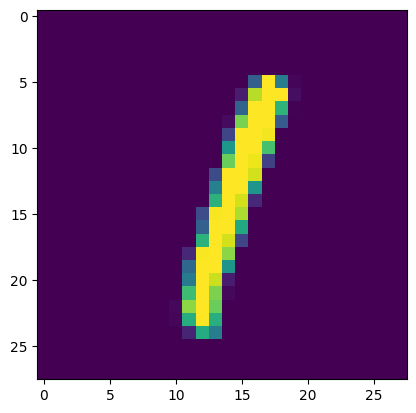

Actual Answer: 1
Predictions: 1


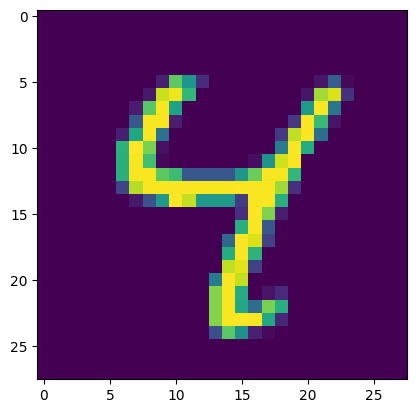

Actual Answer: 4
Predictions: 4


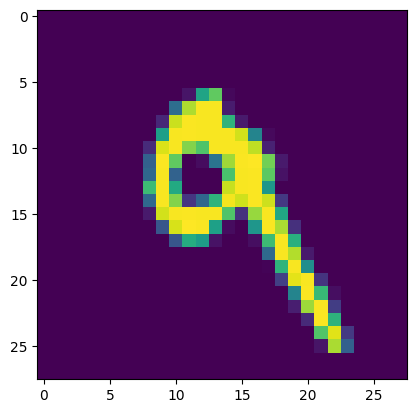

Actual Answer: 9
Predictions: 9


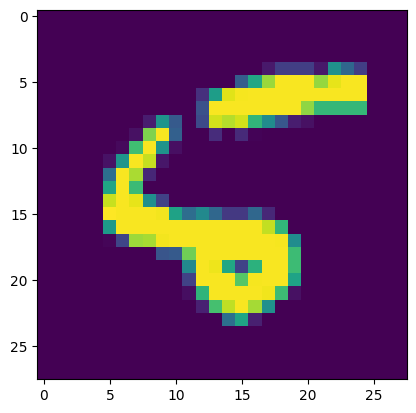

Actual Answer: 5
Predictions: 2


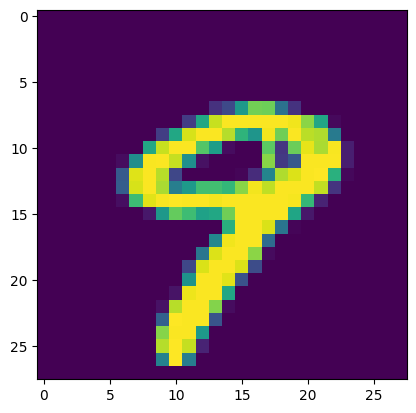

Actual Answer: 9
Predictions: 7


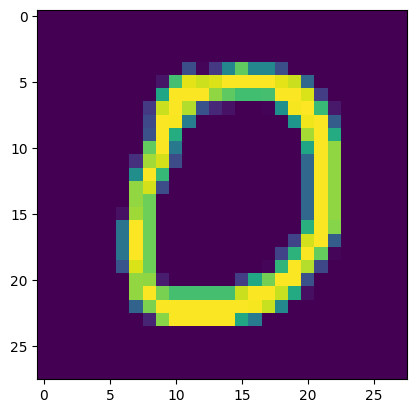

Actual Answer: 0
Predictions: 0


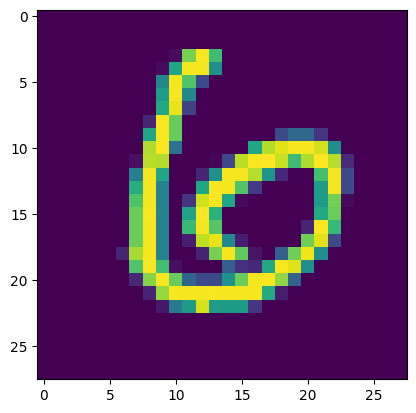

Actual Answer: 6
Predictions: 6


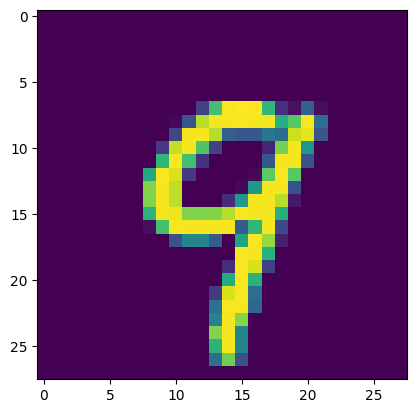

Actual Answer: 9
Predictions: 9


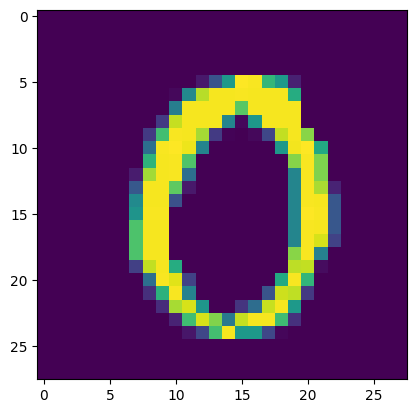

Actual Answer: 0
Predictions: 0


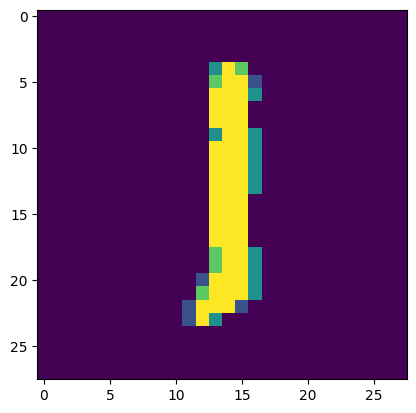

Actual Answer: 1
Predictions: 1


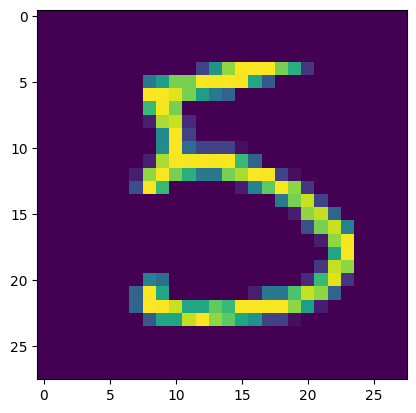

Actual Answer: 5
Predictions: 5


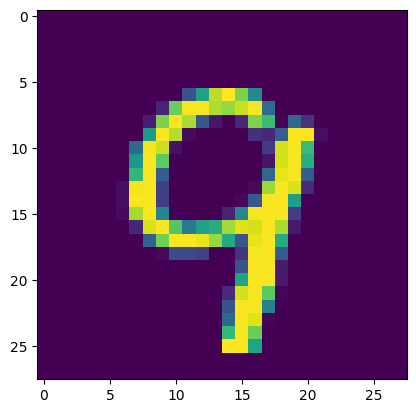

Actual Answer: 9
Predictions: 9


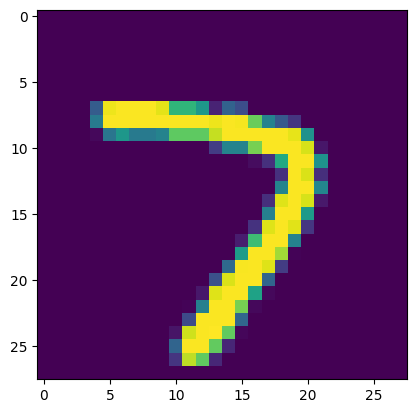

Actual Answer: 7
Predictions: 7


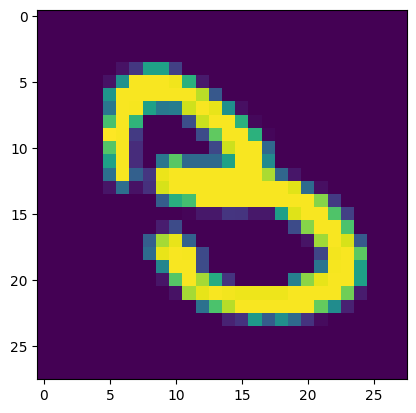

Actual Answer: 3
Predictions: 5


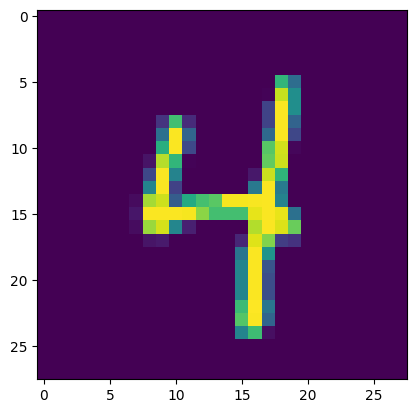

Actual Answer: 4
Predictions: 4


In [18]:
#Let's see some predictions on test set
for i in range(20):
    plt.imshow(x_test[i].reshape((28,28)))
    plt.show()
    print(f"Actual Answer: {y_test[i]}")
    print(f"Predictions: {predict[i]}")